____
### Getting started : Setting up our notebook for modelling lake ecosystems

Our notebook is going to use [`glm-py`](https://github.com/AquaticEcoDynamics/glm-py) to control the lake ecosystem model [`GLM-AED`](https://github.com/AquaticEcoDynamics/glm-aed). We first setup the notebook by cloning the workshop materials and installing the local version of `glm-py` that is included within this repo.

In [1]:
!apt update && apt-get install -y libnetcdf-dev libgd-dev
!mkdir -p glmpy
!git clone --depth 1 --filter=blob:none --sparse https://github.com/AquaticEcoDynamics/efi-workshop
!cd efi-workshop && git sparse-checkout set glmpy case_studies && cp -r glmpy ../ && cp -r case_studies ../ && cd .. && rm -rf efi-workshop
!curl https://raw.githubusercontent.com/AquaticEcoDynamics/efi-workshop/refs/heads/main/requirements.txt --output requirements.txt
!pip install -r requirements.txt
!curl https://raw.githubusercontent.com/AquaticEcoDynamics/efi-workshop/refs/heads/main/bin/glm_3.3.3_linux_x86_64 --output glm
!chmod +x glm
!pip install -e glmpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,729 kB]
Get:13 https://r2u.stat.illinois.edu/u

For running GLM-AED models and making the necessary plots, we use `pandas` and `matplotlib`. For this activity we also are able to benefit from the `example_sims` class in `glm-py`. The `example_sims` module provides prebuilt `GLMSim` objects that can be run immediately. The example we use as our template for this activity is `SparklingSim`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from glmpy import plots
from glmpy.nml import nml, glm_nml, aed_nml
from glmpy.example_sims import SparklingSim

____
### Running `SparklingSim`

`SparklingSim` is a pre-configured [GLM simulation of Sparkling Lake](https://github.com/AquaticEcoDynamics/glm-aed/tree/main/glm-examples/Sparkling), which is located in Wisconsin. glm-py's `GLMSim` object describes a GLM simulation and is responsible for storing all the model data (parameters and boundary condition data) and providing methods needed to run and modify the simulation. As the SparklingSim is a fully contained simulation "object", it brings together simulation configuration details, boundary conditions that have been pre-configured. <br><br> Let's get started by initialising an instance of the `SparklingSim` class to get started:  

In [3]:
sparkling = SparklingSim(sim_name="sparkling")

Running the simulation is as simple as calling the `run()` method (this is a method of the GLMSim class):

In [4]:
sparkling.run(time_sim=True, write_log=True)

Starting sparkling
Finished sparkling in 0:00:01


FYI ... if you want to find more options in any of the methods within the glm-py package, then refer to the [API reference](https://aquaticecodynamics.github.io/glm-py/simulation/.)

As this above call is configured, it will direct GLM's run log information to `glm.log`. We can double click on this file to check the model ran as expected (find this file by navigating the file system to the left, and enter into the `sparkling` folder).

____
### Plotting the lake simulation outputs

`GLM` has a range of options for working with the model's results. For new users to GLM, you can refer to this summary of GLM's output file options in this page in the ['glm-workbook'](https://aquaticecodynamics.github.io/glm-workbook/glm-file-structure.html#glm-output-files). In short, we have 3 main files to explore - the `lake.csv` summary file, the outputs configured at a specific depth (e.g., `WQ_zzz.csv`), and the main `output.nc` file which contains full set of model results.

glm-py's `plots` module provides a collection of classes for plotting these GLM outputs with matplotlib. The `LakePlotter` class provides methods for plotting GLM's `lake.csv` output. Initialise an instance of `LakePlotter` by providing the path to the `lake.csv` output. The outputs of calling run are saved in a directory that matches the sim_name attribute, so that is where the file is found.

<em>Load `lake.csv`</em>:

In [5]:
lake = plots.LakePlotter("sparkling/output/lake.csv")

To get started with understanding the lake, we can explore the main lake water balance. You can refer to this summary of GLM's water balance outputs in the ['glm-workbook'](https://aquaticecodynamics.github.io/glm-workbook/WaterBalance.html), for additional background if needed.

The `lake_volume()` method is used for creating a line plot of the lake volume (in m^3). We can call the method by providing a matplotlib `Axes` object to plot.

<em>Plot time-series of the lake's volume</em>:

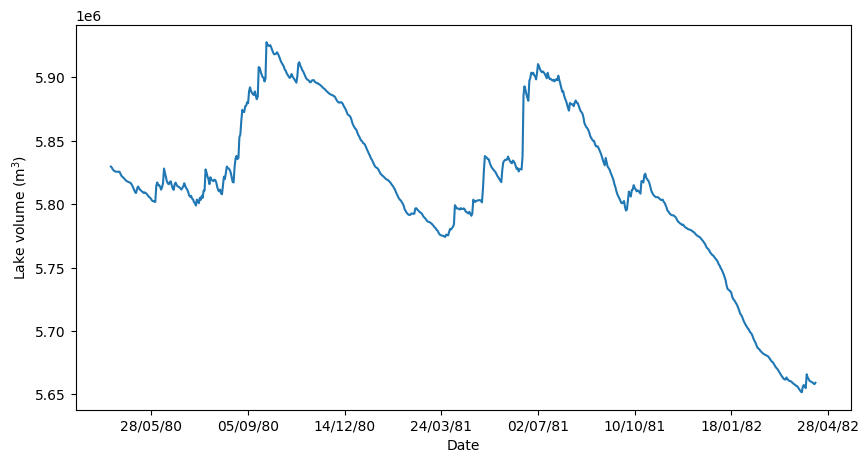

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
lake.lake_volume(ax=ax)

The `water_balance_components()` method is used to create a summary of the daily inflow, outflow, overflow, evaporation, rainfall, local runoff, and snowfall (m^3/day). Parameters for matplotlib's `plot` method can be set for each water balance component by providing a dictionary of keyword arguments.

<em>Plot water balance components</em>:

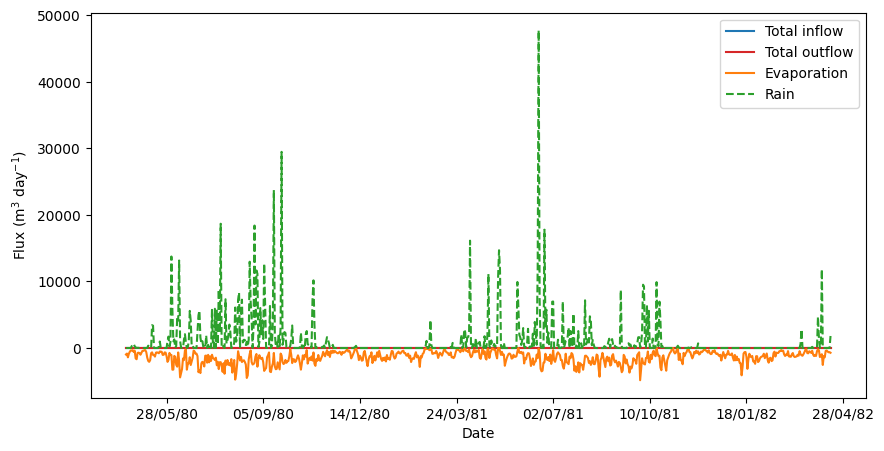

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
out = lake.water_balance_components(
    ax=ax,
    rain_params={"linestyle": "--"},
    local_runoff_params=None,
    overflow_vol_params=None,
    snowfall_params=None
)
ax.legend(handles=out)

More advanced plots can be created by combining LakePlotter's various plot methods:

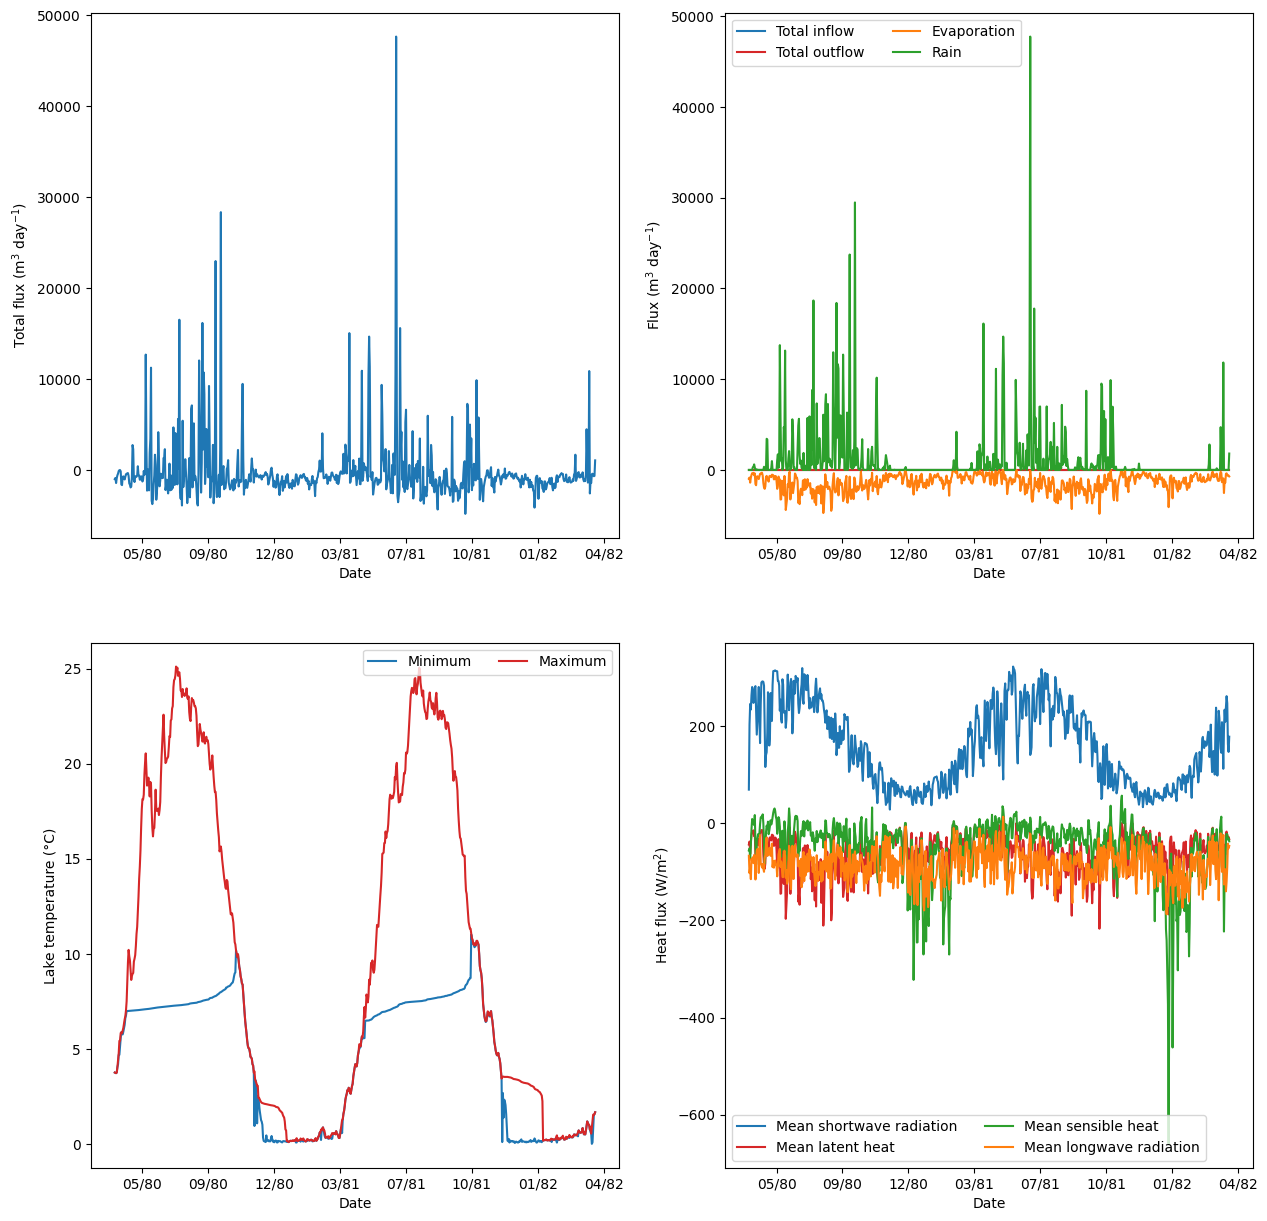

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
date_formatter = mdates.DateFormatter("%m/%y")

out = lake.water_balance(ax=ax[0, 0])
ax[0, 0].xaxis.set_major_formatter(date_formatter)
out = lake.water_balance_components(
    ax=ax[0,1],
    local_runoff_params=None,
    overflow_vol_params=None,
    snowfall_params=None
)
ax[0, 1].legend(handles=out, ncols=2, loc=0)
ax[0, 1].xaxis.set_major_formatter(date_formatter)
out = lake.lake_temp(ax[1, 0])
ax[1, 0].legend(handles=out, ncols=2, loc=0)
ax[1, 0].xaxis.set_major_formatter(date_formatter)
out = lake.heat_balance_components(ax[1, 1])
ax[1, 1].legend(handles=out, ncols=2, loc=0)
ax[1, 1].xaxis.set_major_formatter(date_formatter)

Feel free to customise plots, and further explore other outputs in `lake.csv`.

Now let's turn our attention to the main output, the NetCDF file `output.nc`. The `NCPlotter` class of the `plots` module can be used to load and plot an output variable for all depths and timesteps of the simulation. This class is initialised by providing a path to the `output.nc` NetCDF file.

<em>Load `output.nc` file</em>:

In [9]:
nc = plots.NCPlotter("sparkling/output/output.nc")

<em>Plot the temperature</em>:

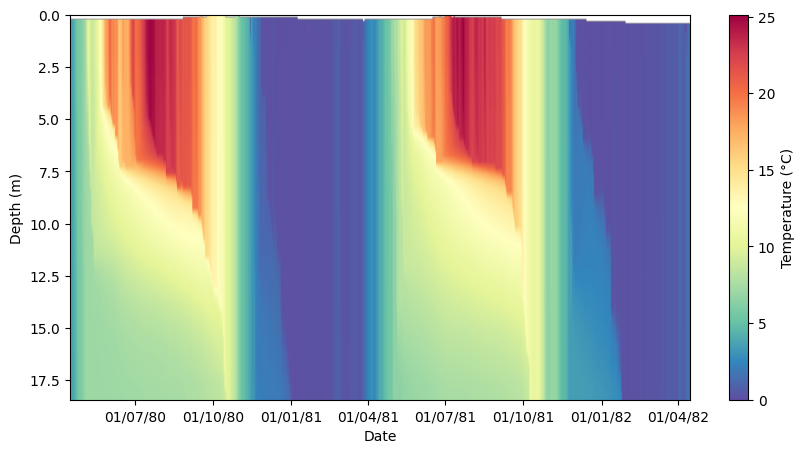

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
out = nc.plot_var_profile(ax=ax, var="temp")
col_bar = fig.colorbar(out)
col_bar.set_label("Temperature (°C)")

`NCPlotter` also provides methods to assist with automating the plotting of variables:

- `get_profile_vars` returns a list of variables that can be plotted with `plot_var_profile`
- `get_long_name` returns the unabbreviated name of a variable
- `get_units` returns the units of a variable

<em>Check the other variables available</em>:

In [11]:
vars = nc.get_profile_vars()
vars

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub']

<em>Create a multi-panel with 4 of the output variables</em>:

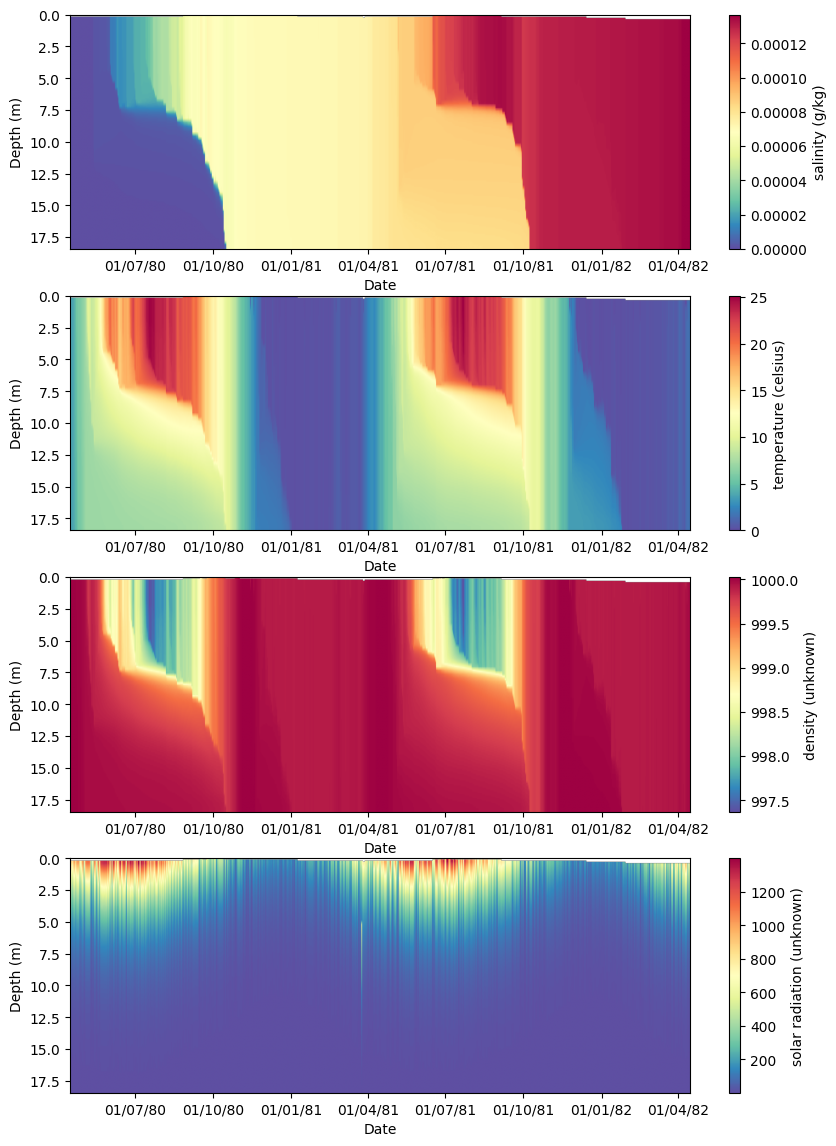

In [12]:
plot_vars = vars[3:7]     # returns the variables: ['salt', 'temp', 'dens','radn']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{long_name} ({units})")

____
### Inspecting the NML, getting and setting configuration options

The `nml` attribute of a `GLMSim` object is resposible for storing all the model parameters found in `.nml` files. These parameters are represented as `NMLParam` objects that are stored in a hierarchical structure of `NMLBlock` objects and `NML` objects. Individual parameters can be accessed directly on the `GLMSim` object using the following syntax:

In [13]:
sparkling.nml["glm"].blocks["glm_setup"].params["min_layer_vol"].value

0.5

In [14]:
sparkling.nml["glm"].blocks["glm_setup"].params["min_layer_vol"].value = 1.0

For a less verbose syntax, parameter values can also be accessed using the `get_param_value()` and `set_param_value()` methods:

In [15]:
sparkling.set_param_value("glm", "glm_setup", "min_layer_vol", 0.5)

In [16]:
sparkling.get_param_value("glm", "glm_setup", "min_layer_vol")

0.5

Blocks of parameters (`NMLBlock` objects) can also be accessed directly via attributes or using the `get_block()` and `set_block()` methods. The `to_dict()` method returns a dictionary representation of the block's parameters:

In [17]:
sparkling.nml["glm"].blocks["glm_setup"].to_dict()

{'sim_name': 'sparkling',
 'max_layers': 500,
 'min_layer_vol': 0.5,
 'min_layer_thick': 0.15,
 'max_layer_thick': 0.5,
 'density_model': 1,
 'non_avg': True}

In [18]:
sparkling.get_block("glm", "glm_setup").to_dict()

{'sim_name': 'sparkling',
 'max_layers': 500,
 'min_layer_vol': 0.5,
 'min_layer_thick': 0.15,
 'max_layer_thick': 0.5,
 'density_model': 1,
 'non_avg': True}

`NML` objects, that store a collection of `NMLBlock` objects, can be accessed in a similar way:

In [19]:
sparkling.nml["glm"].to_dict()

OrderedDict([('glm_setup',
              {'sim_name': 'sparkling',
               'max_layers': 500,
               'min_layer_vol': 0.5,
               'min_layer_thick': 0.15,
               'max_layer_thick': 0.5,
               'density_model': 1,
               'non_avg': True}),
             ('time',
              {'timefmt': 3,
               'start': '1980-04-15',
               'stop': '2012-12-10',
               'dt': 3600.0,
               'num_days': 730,
               'timezone': -6.0}),
             ('morphometry',
              {'lake_name': 'nhd_13344210',
               'latitude': 46.00881,
               'longitude': -89.69953,
               'base_elev': None,
               'crest_elev': 320.0,
               'bsn_len': 901.0385,
               'bsn_wid': 901.0385,
               'bsn_vals': 16,
               'H': [301.712,
                303.018285714286,
                304.324571428571,
                305.630857142857,
                306.937142857143,
    

In [20]:
sparkling.get_nml("glm").to_dict()

OrderedDict([('glm_setup',
              {'sim_name': 'sparkling',
               'max_layers': 500,
               'min_layer_vol': 0.5,
               'min_layer_thick': 0.15,
               'max_layer_thick': 0.5,
               'density_model': 1,
               'non_avg': True}),
             ('time',
              {'timefmt': 3,
               'start': '1980-04-15',
               'stop': '2012-12-10',
               'dt': 3600.0,
               'num_days': 730,
               'timezone': -6.0}),
             ('morphometry',
              {'lake_name': 'nhd_13344210',
               'latitude': 46.00881,
               'longitude': -89.69953,
               'base_elev': None,
               'crest_elev': 320.0,
               'bsn_len': 901.0385,
               'bsn_wid': 901.0385,
               'bsn_vals': 16,
               'H': [301.712,
                303.018285714286,
                304.324571428571,
                305.630857142857,
                306.937142857143,
    

____
### Inspecting the boundary conditions

All boundary conditions files needed to run a GLM simulation are stored in the `bcs` attribute. `bcs` is a dictionary where the key is the output file name (without the file extension), and the value is a Pandas `DataFrame` object:

In [21]:
sparkling.bcs['nldas_driver']

time  ShortWave    LongWave    AirTemp     RelHum  WindSpeed  \
0      1979-01-04  64.977542  154.963333 -26.216667  80.721282   4.457186   
1      1979-01-05  66.504208  191.911250 -22.270000  81.503118   6.138615   
2      1979-01-06  72.646917  169.869167 -21.644167  78.389317   6.958405   
3      1979-01-07  85.559750  129.545417 -26.174583  81.127188   5.411739   
4      1979-01-08  81.262625  154.904167 -23.307500  81.392957   6.382663   
...           ...        ...         ...        ...        ...        ...   
13507  2015-12-28  33.221333  250.653750  -3.570417  89.572376   4.102496   
13508  2015-12-29  76.399625  246.696250  -3.055833  84.142622   4.812748   
13509  2015-12-30  72.456917  202.108333  -7.472500  76.908791   5.758256   
13510  2015-12-31  48.200583  279.344583  -5.318333  85.940695   7.105278   
13511  2016-01-01   0.000000  278.470000  -4.620000  88.207757   3.871104   

       Rain      Snow  
0       0.0  0.000000  
1       0.0  0.000000  
2       0.0  0.000000  
3       0.0  0.000000  
4       0.0  0.000000  
...     ...       ...  
13507   0.0  0.002304  
13508   0.0  0.000148  
13509   0.0  0.000000  
13510   0.0  0.053302  
13511   0.0  0.077376  

[13512 rows x 8 columns]

Boundary condition dataframes can be modified using the Pandas API:

In [22]:
sparkling.bcs['nldas_driver']['ShortWave'] = sparkling.bcs['nldas_driver']['ShortWave'] * 2
sparkling.bcs['nldas_driver']

time   ShortWave    LongWave    AirTemp     RelHum  WindSpeed  \
0      1979-01-04  129.955083  154.963333 -26.216667  80.721282   4.457186   
1      1979-01-05  133.008417  191.911250 -22.270000  81.503118   6.138615   
2      1979-01-06  145.293833  169.869167 -21.644167  78.389317   6.958405   
3      1979-01-07  171.119500  129.545417 -26.174583  81.127188   5.411739   
4      1979-01-08  162.525250  154.904167 -23.307500  81.392957   6.382663   
...           ...         ...         ...        ...        ...        ...   
13507  2015-12-28   66.442667  250.653750  -3.570417  89.572376   4.102496   
13508  2015-12-29  152.799250  246.696250  -3.055833  84.142622   4.812748   
13509  2015-12-30  144.913833  202.108333  -7.472500  76.908791   5.758256   
13510  2015-12-31   96.401167  279.344583  -5.318333  85.940695   7.105278   
13511  2016-01-01    0.000000  278.470000  -4.620000  88.207757   3.871104   

       Rain      Snow  
0       0.0  0.000000  
1       0.0  0.000000  
2       0.0  0.000000  
3       0.0  0.000000  
4       0.0  0.000000  
...     ...       ...  
13507   0.0  0.002304  
13508   0.0  0.000148  
13509   0.0  0.000000  
13510   0.0  0.053302  
13511   0.0  0.077376  

[13512 rows x 8 columns]

In [23]:
sparkling.bcs['nldas_driver']['ShortWave'] = sparkling.bcs['nldas_driver']['ShortWave'] / 2
sparkling.bcs['nldas_driver']


time  ShortWave    LongWave    AirTemp     RelHum  WindSpeed  \
0      1979-01-04  64.977542  154.963333 -26.216667  80.721282   4.457186   
1      1979-01-05  66.504208  191.911250 -22.270000  81.503118   6.138615   
2      1979-01-06  72.646917  169.869167 -21.644167  78.389317   6.958405   
3      1979-01-07  85.559750  129.545417 -26.174583  81.127188   5.411739   
4      1979-01-08  81.262625  154.904167 -23.307500  81.392957   6.382663   
...           ...        ...         ...        ...        ...        ...   
13507  2015-12-28  33.221333  250.653750  -3.570417  89.572376   4.102496   
13508  2015-12-29  76.399625  246.696250  -3.055833  84.142622   4.812748   
13509  2015-12-30  72.456917  202.108333  -7.472500  76.908791   5.758256   
13510  2015-12-31  48.200583  279.344583  -5.318333  85.940695   7.105278   
13511  2016-01-01   0.000000  278.470000  -4.620000  88.207757   3.871104   

       Rain      Snow  
0       0.0  0.000000  
1       0.0  0.000000  
2       0.0  0.000000  
3       0.0  0.000000  
4       0.0  0.000000  
...     ...       ...  
13507   0.0  0.002304  
13508   0.0  0.000148  
13509   0.0  0.000000  
13510   0.0  0.053302  
13511   0.0  0.077376  

[13512 rows x 8 columns]

____
### Adding AED to enable water quality and ecology in the model

`SparklingSim` currently lacks the `wq_setup` block, which goes in the main `glm.nml` file:

In [24]:
print(sparkling.get_block(nml_name="glm", block_name="wq_setup"))

None


We can create a `NMLBlock` object for `wq_setup` using the `WQSetupBlock` class in the `glm_nml` module:

In [25]:
wq_setup = glm_nml.WQSetupBlock(
    wq_lib="aed",
    wq_nml_file='aed/aed.nml',
    ode_method=1,
    split_factor=1,
    bioshade_feedback=True,
    repair_state=True,
)

Next, we assign the block to the `GLMNML` object:

In [26]:
sparkling.set_block(nml_name="glm", block=wq_setup)

Now `GLM` is primed to be ready to engage AED when we run the simulation next. Once this block is enabled we need to be sure that `aed/aed.nml` is available and configured in the SparklingSim object. We will do this separately for each case study below ...

### Adding depth specific WQ outputs

But first, lets ask GLM to write out the relevant WQ variables that we wish to plot in the specific-depth csv file; change the `vars`

In [27]:
output = glm_nml.OutputBlock(
    out_dir="output",
    out_fn="output",
    nsave=24,
    csv_lake_fname="lake",
    csv_point_nlevs=2,
    csv_point_fname="WQ_",
    csv_point_at=[3.0, 17.0],  # One at the top and one at the bottom
    csv_point_nvars=3,
    csv_point_vars=["temp", "salt", "OXY_oxy"],
)
sparkling.set_block(nml_name="glm", block=output)

____
### Case 1 : Let's start by adding a single AED module, simulating oxygen

Our AED configuration to start is a simple 1 variable model ($O_2$), simulating two processes (atmospheric and sediment dissolved oxygen exchange). Rather than setting all the parameters individually, we can load in the `aed_case1.json` file that contains the AED configuration for this simulation setup. We will use `NMLReader` to read the JSON file and contruct the desired `AEDNML` object that can be added to the `GLMSim` object:

In [28]:
nml_file = nml.NMLReader("case_studies/aed_case1.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
print(type(aed_nml_obj))

<class 'glmpy.nml.aed_nml.AEDNML'>


Let's check the simulation now includes our AED (oxygen) outputs:

In [29]:
sparkling.set_nml(aed_nml_obj)
sparkling.get_param_value("aed", "aed_models", "models")

['aed_oxygen']

To avoid overwriting the previous Sparkling outputs, change the `sim_name` attribute. This will set the name of simulation output directory and update the `sim_name` parameter in the `glm_setup` block:

In [30]:
sparkling.sim_name = "case_1"

Re-run the simulation, now that AED is enabled:

In [31]:
sparkling.run(time_sim=True, write_log=True)

Starting case_1
Finished case_1 in 0:00:02


You can check the new configuration details by opening the glm.log file, which has the simulation information including the list of simulated AED variables.

To create a time-depth contour plot for Case 1, change the `glm_nc` attribute of the `NCPlotter` class you initialised earlier:

In [33]:
nc.glm_nc = "case_1/output/output.nc"
nc.get_profile_vars()

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub',
 'OXY_oxy',
 'OXY_sat',
 'OXY_oxy_dsfv',
 'OXY_oxy_atmv']

Now lets plot $O_2$ (`OXY_oxy`):

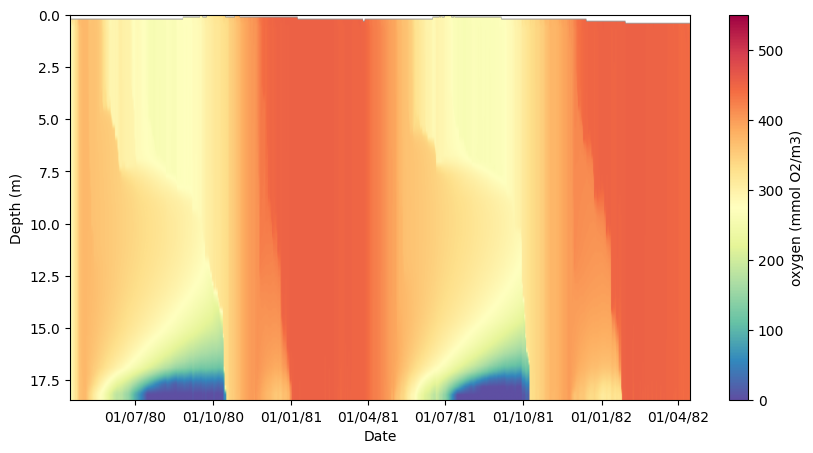

In [34]:
var = "OXY_oxy"
fig, ax = plt.subplots(figsize=(10, 5))
plot_params = {"vmin": 0, "vmax": 550}
out = nc.plot_var_profile(ax=ax, var=var, param_dict=plot_params)
col_bar = fig.colorbar(out)
col_bar.set_label(f"{nc.get_long_name(var)} ({nc.get_units(var)})")

We can investigate the processes controlling the sim by plotting some of the AED "diagnostics". See the list [here](https://aquaticecodynamics.github.io/aed-science/DO_1.html#diagnostics) for `aed_oxygen`. In this example `OXY_oxy_atmv` is the atmospheric flux of oxygen in units of $mmol\:O_2/m^3/d$, and `OXY_oxy_dsfv` is the dissolved sediment flux of oxygen entering into a layer in units of $mmol\:O_2/m^3/d$.

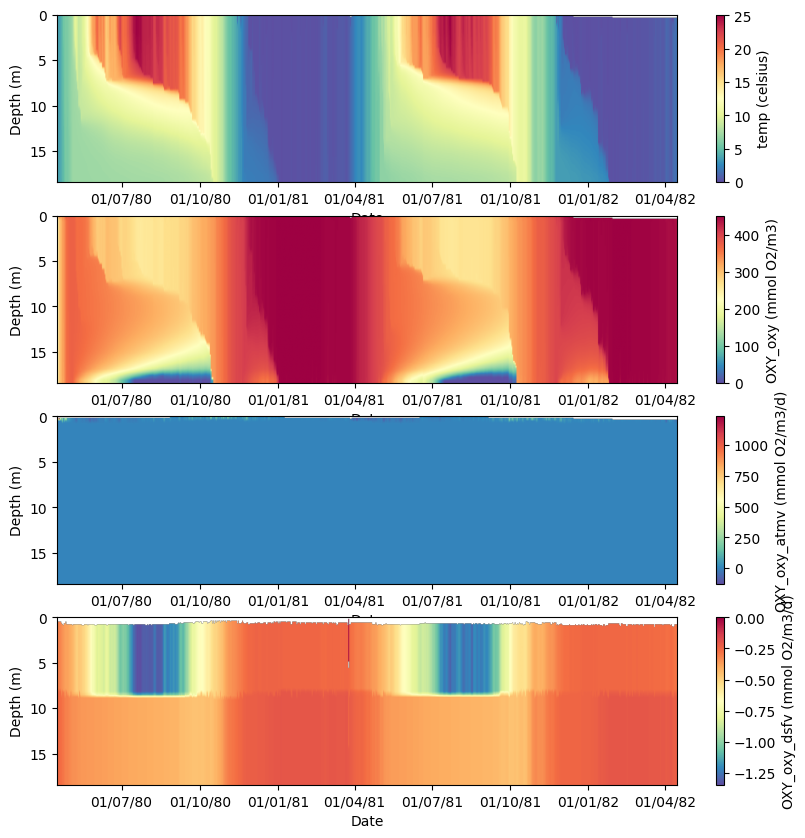

In [35]:
plot_vars = ['temp', 'OXY_oxy', 'OXY_oxy_atmv','OXY_oxy_dsfv']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")

____
### Case 2 : Allow spatial (depth-based) variation in sediment-water oxygen flux -> Enabling Zones

In the above exmaple, each GLM water layer receives the same sediment oxygen flux fro the area fo water overlying sediment. However, in reality there may be depth-dependent differences in the sediment biogeochemical properties.

In this task we review the benthic zones configured in GLM, and ensure the AED modules are correctly configured. Start by inspecting `aed_case2.json`. What new module do you see activated in here? In particular, not how the `fsed_oxy_variable` variable is now be used to link modules.

In [36]:
nml_file = nml.NMLReader("case_studies/aed_case2.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
sparkling.set_nml(aed_nml_obj)
sparkling.get_param_value("aed", "aed_models", "models")

['aed_sedflux', 'aed_oxygen']

In [37]:
sparkling.sim_name = "case_2"

In [38]:
sparkling.run(time_sim=True, write_log=True)

Starting case_2
Finished case_2 in 0:00:02


In [39]:
nc.glm_nc = "case_2/output/output.nc"
nc.get_profile_vars()

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub',
 'OXY_oxy',
 'OXY_sat',
 'OXY_oxy_dsfv',
 'OXY_oxy_atmv']

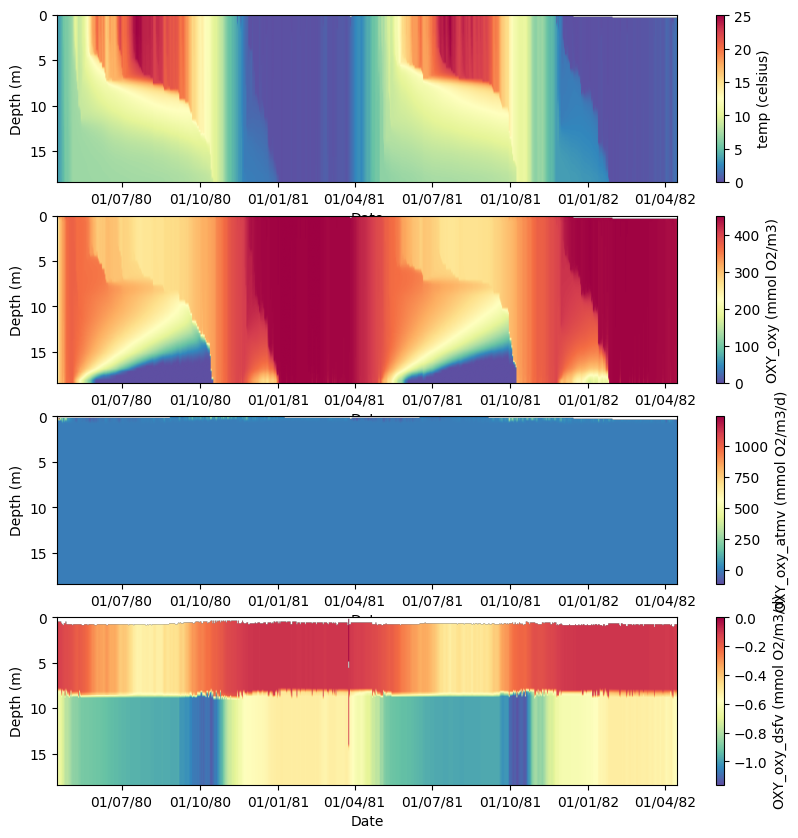

In [41]:
plot_vars = ['temp', 'OXY_oxy', 'OXY_oxy_atmv','OXY_oxy_dsfv']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")

Noting the different $F_{sed}$ (`Fsed_oxy`) values used in each benthic zone for oxygen, how does the $O_2$ conditions now vary relative to Case 1?

`NCPlotter` also supports plotting a variable for each sediment zone using `plot_var_zone()`. The number of sediment zones are determined by the `n_zones` parameters of the `sediment` block:

In [42]:
sparkling.get_param_value("glm", "sediment", "n_zones")

3

To find the variables that can be plotted with `plot_var_zone()`. Call the `get_zone_vars()` method:

In [43]:
nc.get_zone_vars()

['SDF_Fsed_oxy_Z', 'OXY_oxy_dsf_Z', 'OXY_oxy_atm_Z']

Plot a variable for specific zone by providing `plot_var_zone` with the `Axes` object, the variable name, the zone number, and any additional keyword arguments that will by passed to matplotlib's `plot()` method:

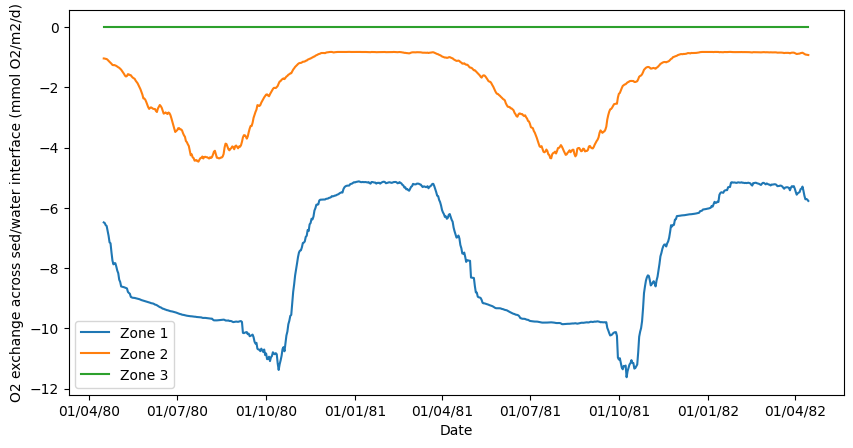

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
nc.plot_var_zone(ax=ax, var="OXY_oxy_dsf_Z", zone=1, param_dict={"label": "Zone 1"})
nc.plot_var_zone(ax, "OXY_oxy_dsf_Z", 2, {"label": "Zone 2"})
nc.plot_var_zone(ax, "OXY_oxy_dsf_Z", 3, {"label": "Zone 3"})
ax.legend()

One thing we can do now is compare the two case-studies, and look at the surface and bottom $O_2$ concentrations (i.e. with and without the spatially variable sediment oxygen demand).

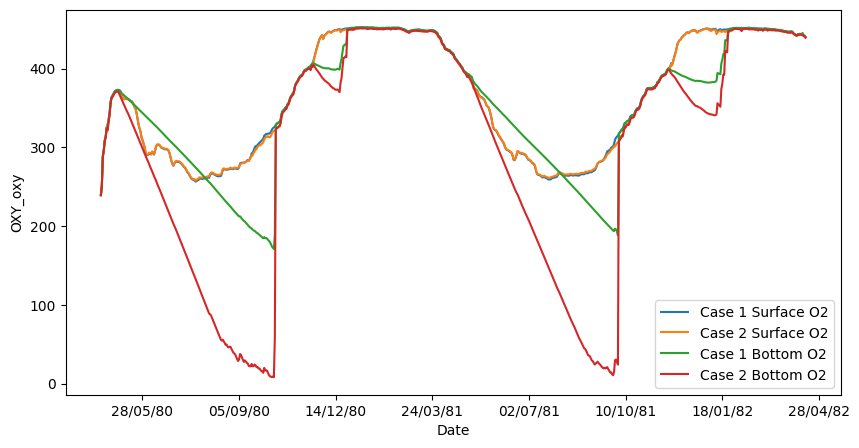

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
wq = plots.WQPlotter()                                    # SEE BELOW SECTION ON WQ_PLOTTER
for i in range(1, 3):
    wq.wq_csv = f"case_{i}/output/WQ_17.csv"                      # SURFACE
    wq.plot_var(ax, "OXY_oxy", {"label": f"Case {i} Surface O2"}) # OXYGEN
for i in range(1, 3):
    wq.wq_csv = f"case_{i}/output/WQ_3.csv"                       # BOTTOM
    wq.plot_var(ax, "OXY_oxy", {"label": f"Case {i} Bottom O2"})  # OXYGEN
ax.legend()

Feel free to now use the NML methods introduced above to change the number of zones and their depths, and the sediment oxygen demand values. You can click to a new code block below if you wish to experiment with this feature.

____
### Case 3 : Now let's try adding primary productivity -> Chl-a

In Case 3 we'll add the phytoplankton module into the simulation. Lets first update its name:

In [46]:
sparkling.sim_name = "case_3"

Inspect the `aed_case3.json` file, and now note that the presence of the new `aed_phytoplankton` block. You'll note with this block that all the module links (dependencies) needed for this module are set to have blank quotes, since those modules are not yet enabled. In this case, the only feedback of the $PHY$ module is to $O_2$. Now load the json config into the sim:

In [47]:
nml_file = nml.NMLReader("case_studies/aed_case3.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
sparkling.set_nml(aed_nml_obj)
sparkling.aed_dbase = ["case_studies/aed_phyto_pars.csv"]
sparkling.get_param_value("aed", "aed_models", "models")

['aed_sedflux', 'aed_oxygen', 'aed_phytoplankton']

Before running the sim, add some of the new $PHY$ module variables that we may want to compare later into the csv file:

In [48]:

output = glm_nml.OutputBlock(
    out_dir="output",
    out_fn="output",
    nsave=24,
    csv_lake_fname="lake",
    csv_point_nlevs=2,
    csv_point_fname="WQ_",
    csv_point_at=[3.0, 17.0],  # One at the top and one at the bottom
    csv_point_nvars=4,
    csv_point_vars=["temp", "salt", "OXY_oxy", "PHY_tchla"],
)
sparkling.set_block(nml_name="glm", block=output)

In [49]:
sparkling.run(time_sim=True, write_log=True)

Starting case_3
Finished case_3 in 0:00:06


In [50]:
nc.glm_nc = "case_3/output/output.nc"
nc.get_profile_vars()

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub',
 'OXY_oxy',
 'OXY_sat',
 'OXY_oxy_dsfv',
 'OXY_oxy_atmv',
 'PHY_cyano',
 'PHY_cyano_IN',
 'PHY_cyano_IP',
 'PHY_cyano_NtoP',
 'PHY_cyano_fI',
 'PHY_cyano_fNit',
 'PHY_cyano_fPho',
 'PHY_cyano_fSil',
 'PHY_cyano_fT',
 'PHY_cyano_fSal',
 'PHY_cyano_gpp_c',
 'PHY_cyano_rsp_c',
 'PHY_cyano_exc_c',
 'PHY_cyano_mor_c',
 'PHY_cyano_set_c',
 'PHY_cyano_gpp_n',
 'PHY_cyano_rsp_n',
 'PHY_cyano_exc_n',
 'PHY_cyano_mor_n',
 'PHY_cyano_set_n',
 'PHY_cyano_gpp_p',
 'PHY_cyano_rsp_p',
 'PHY_cyano_exc_p',
 'PHY_cyano_mor_p',
 'PHY_cyano_set_p',
 'PHY_tphy',
 'PHY_tchla',
 'PHY_in',
 'PHY_ip',
 'PHY_gpp',
 'PHY_ncp',
 'PHY_upt_no3',
 'PHY_upt_nh4',
 'PHY_upt_n2',
 'PHY_upt_po4',
 'PHY_upt_dic',
 'PHY_set',
 'PHY_par']

Plot the results, comparing $T$, $O_2$, $PAR$ and $PHY$:

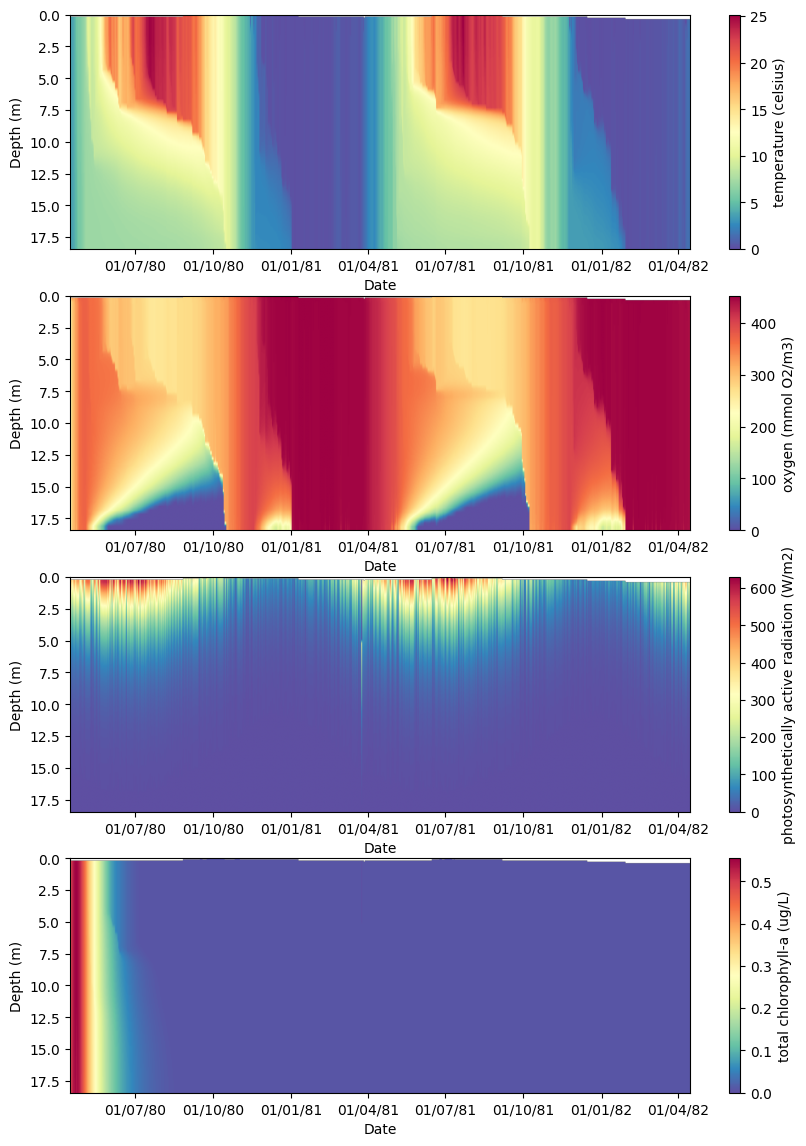

In [51]:
plot_vars = ['temp', 'OXY_oxy', 'PHY_par','PHY_tchla']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{long_name} ({units})")

OK, so in this simulation what do you see in terms fo phytoplankton biomass? It may not be as you expect, so we can dig deeper and look at some diagnostics. The limitation functions for the simulated group can be a useful starting point, $\Phi(I)$, $\Phi(T)$, $\Phi(N)$, $\Phi(P)$ (see [10.3.1](https://aquaticecodynamics.github.io/aed-science/phytoplankton.html#process-descriptions-5) in the AED manual):

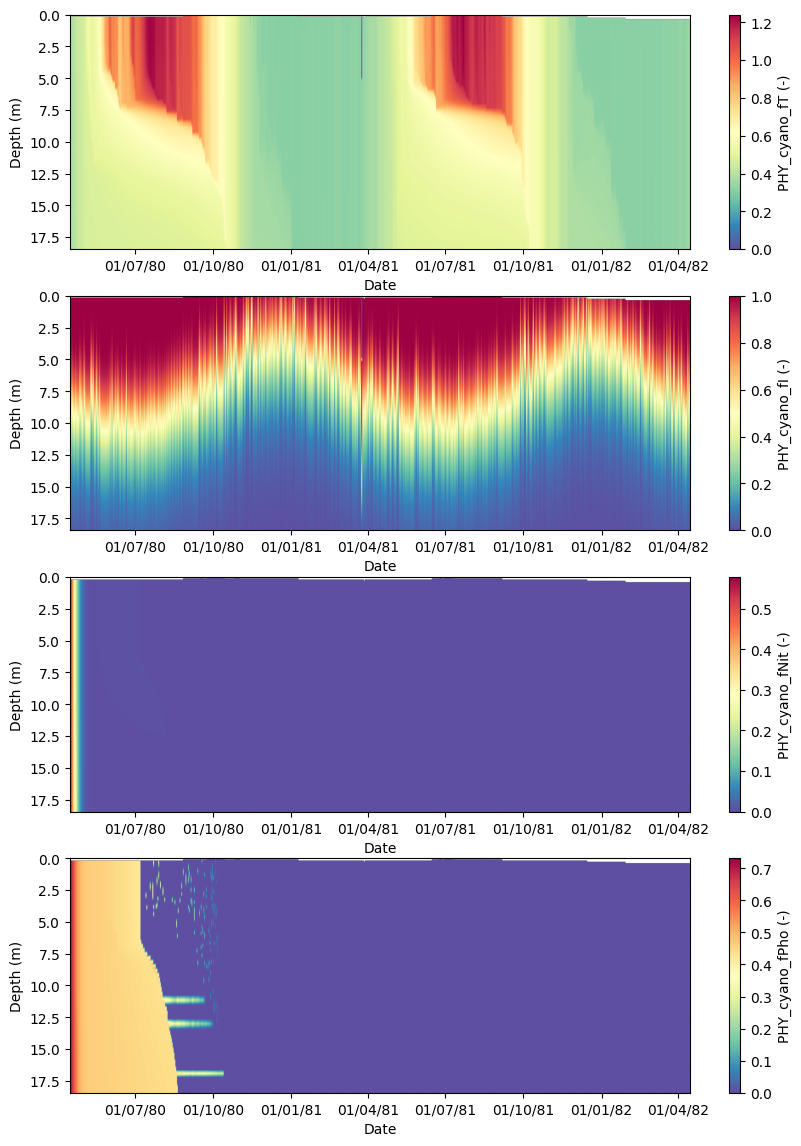

In [52]:
plot_vars = ['PHY_cyano_fT', 'PHY_cyano_fI', 'PHY_cyano_fNit','PHY_cyano_fPho']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")

____
### Case 4 : OK, OK,  let's do it properly with nutrients and all feedbacks -> Nutrients and Chl-a

The above case allowed for phytoplankton growth just limited by temperature, salinity and light. In Case 4, we'll add nutrient and organic matter modules into the simulation. Inspect `aed_case4.json`, and note several new aed blocks added into the configuration. Note the variable links now configured for the phytoplankton dependencies are all set to enable the module interactions.  

In [53]:
sparkling.sim_name = "case_4"

In [55]:
nml_file = nml.NMLReader("case_studies/aed_case4.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
sparkling.nml["aed"] = aed_nml_obj
sparkling.aed_dbase = ["case_studies/aed_phyto_pars.csv"]
sparkling.get_param_value("aed", "aed_models", "models")

['aed_sedflux',
 'aed_oxygen',
 'aed_silica',
 'aed_nitrogen',
 'aed_phosphorus',
 'aed_organic_matter',
 'aed_phytoplankton']

In [54]:
output = glm_nml.OutputBlock(
    out_dir="output",
    out_fn="output",
    nsave=24,
    csv_lake_fname="lake",
    csv_point_nlevs=2,
    csv_point_fname="WQ_",
    csv_point_at=[3.0, 17.0],  # One at the top and one at the bottom
    csv_point_nvars=5,
    csv_point_vars=["temp", "salt", "OXY_oxy", "PHY_tchla", "PHS_frp"],
)
sparkling.set_block(nml_name="glm", block=output)

In [56]:
sparkling.run(time_sim=True, write_log=True)

Starting case_4
Finished case_4 in 0:00:07


In [59]:
nc.glm_nc = "case_4/output/output.nc"
nc.get_profile_vars()

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub',
 'OXY_oxy',
 'OXY_sat',
 'OXY_oxy_dsfv',
 'OXY_oxy_atmv',
 'SIL_rsi',
 'NIT_amm',
 'NIT_nit',
 'NIT_n2o',
 'NIT_no2',
 'NIT_nitrif',
 'NIT_denit',
 'NIT_anammox',
 'NIT_dnra',
 'NIT_n2oprod',
 'PHS_frp',
 'OGM_doc',
 'OGM_poc',
 'OGM_don',
 'OGM_pon',
 'OGM_dop',
 'OGM_pop',
 'OGM_docr',
 'OGM_donr',
 'OGM_dopr',
 'OGM_cpom',
 'OGM_poc_set',
 'OGM_cpom_set',
 'OGM_pon_set',
 'OGM_pop_set',
 'OGM_cdom',
 'OGM_poc_hyd',
 'OGM_pon_hyd',
 'OGM_pop_hyd',
 'OGM_doc_min',
 'OGM_don_min',
 'OGM_dop_min',
 'OGM_doc_anaerobic',
 'OGM_doc_denit',
 'OGM_docr_min',
 'OGM_donr_min',
 'OGM_dopr_min',
 'OGM_cpom_bdown',
 'OGM_bod5',
 'OGM_pom_vvel',
 'OGM_cpom_vvel',
 'PHY_cyano',
 'PHY_cyano_IN',
 'PHY_cyano_IP',
 'PHY_cyano_NtoP',
 'PHY_cyano_fI',
 'PHY_cyano_fNit',
 'PHY_cyano_fPho',
 'PHY_cyano_fSil',
 'PHY_cyano_fT',
 'PHY_cyano_fSal',
 'PHY_cyano_gpp_c',
 'PHY_cyano_rsp_c',
 'PHY_cyano_exc_c',
 'PHY_cyano_

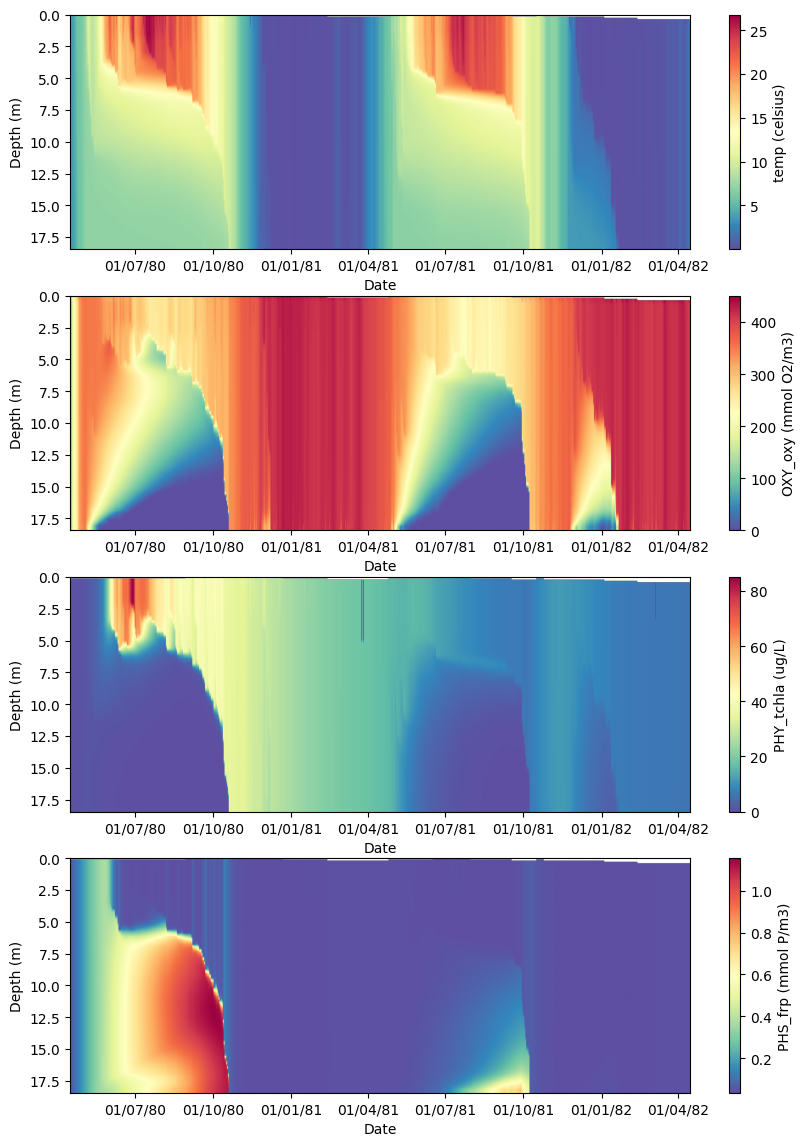

In [60]:
plot_vars = ['temp', 'OXY_oxy', 'PHY_tchla','PHS_frp']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")

As we did above, we can explore the main environmental limitation factors controlling growth:

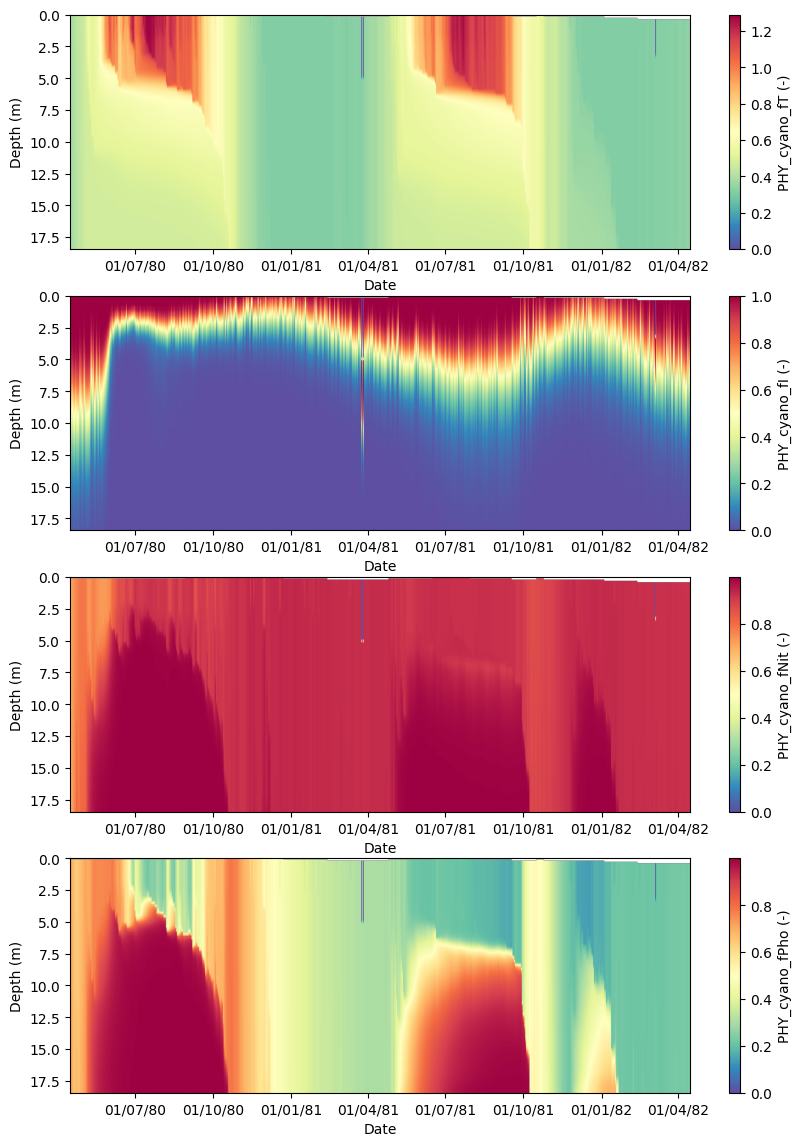

In [61]:
plot_vars = ['PHY_cyano_fT', 'PHY_cyano_fI', 'PHY_cyano_fNit','PHY_cyano_fPho']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")

Which factors are limiting growth at different depths and different times?

We can take a step further and look at the various flux pathways shaping the biomass. Below we plot gross primary productivity $GPP$, respiration $RSP$, excretion $EXC$, and mortality $MOR$:

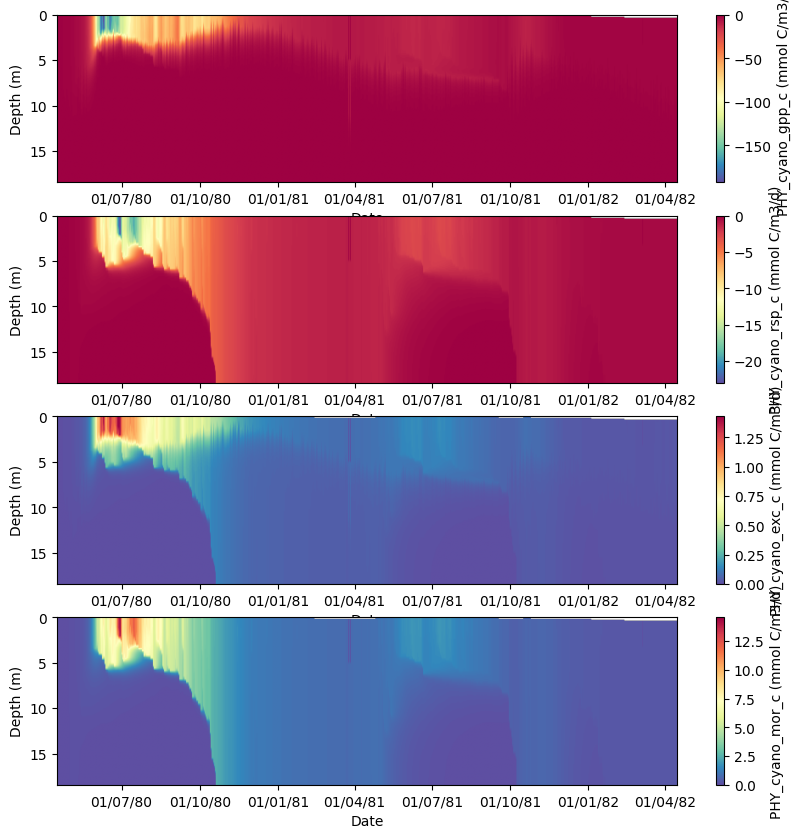

In [62]:
plot_vars = ['PHY_cyano_gpp_c', 'PHY_cyano_rsp_c', 'PHY_cyano_exc_c','PHY_cyano_mor_c']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")


Note we have just plotted this for $C$, but we could also investigate $N$ or $P$ specific process rates as well.

The phytoplankton module has numerous options, which can be explored [here in the AED manual](https://aquaticecodynamics.github.io/aed-science/phytoplankton.html). <br>

Options to consider when configuring a phytoplankton simulation:
- Temperature optimum and maximum
- Light limitation : photo-inhibited or non-photoinhibited
- Nutrient stoichiometry : fixed C:N:P or luxury internal storage
- Settling or migration : Constant, Stoke’s , Internal Buoyancy, Motility
- Microphytobenthos (MPB) pool

____
### Case 5 : Now let's add multiple phytoplankton groups -> Phytoplankton Functional Groups

The above case had one group of phytoplankton. For convenience we called it "cyano" but it was essentially acting as a "bulk" assemblage of many species.

In this case we explore the concept of PFT's : phytoplankton functional groups. To do this we enable 3 different groups.

Open the `aed_case5.json` and review the `num_phytos` parameter. Note users can now select any species from the phytoplankton database (`aed_phyto_pars.csv`). This is done by setting the `the_phytos` list. e.g.,
<br>
<br>
`the_phytos = 1,2,3`
<br>
<br>
asks the model to configure the 3 groups called `cyano`, `green`, and `diatom`.

In [63]:
nml_file = nml.NMLReader("case_studies/aed_case5.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
sparkling.nml["aed"] = aed_nml_obj
sparkling.aed_dbase = ["case_studies/aed_phyto_pars.csv"]
sparkling.get_param_value("aed", "aed_models", "models")

['aed_sedflux',
 'aed_oxygen',
 'aed_silica',
 'aed_nitrogen',
 'aed_phosphorus',
 'aed_organic_matter',
 'aed_phytoplankton']

In [64]:
sparkling.sim_name = "case_5"

In [67]:
sparkling.run(time_sim=True, write_log=True)

Starting case_5
Finished case_5 in 0:00:10


In [68]:
nc.glm_nc = "case_5/output/output.nc"
nc.get_profile_vars()

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub',
 'OXY_oxy',
 'OXY_sat',
 'OXY_oxy_dsfv',
 'OXY_oxy_atmv',
 'SIL_rsi',
 'NIT_amm',
 'NIT_nit',
 'NIT_n2o',
 'NIT_no2',
 'NIT_nitrif',
 'NIT_denit',
 'NIT_anammox',
 'NIT_dnra',
 'NIT_n2oprod',
 'PHS_frp',
 'OGM_doc',
 'OGM_poc',
 'OGM_don',
 'OGM_pon',
 'OGM_dop',
 'OGM_pop',
 'OGM_docr',
 'OGM_donr',
 'OGM_dopr',
 'OGM_cpom',
 'OGM_poc_set',
 'OGM_cpom_set',
 'OGM_pon_set',
 'OGM_pop_set',
 'OGM_cdom',
 'OGM_poc_hyd',
 'OGM_pon_hyd',
 'OGM_pop_hyd',
 'OGM_doc_min',
 'OGM_don_min',
 'OGM_dop_min',
 'OGM_doc_anaerobic',
 'OGM_doc_denit',
 'OGM_docr_min',
 'OGM_donr_min',
 'OGM_dopr_min',
 'OGM_cpom_bdown',
 'OGM_bod5',
 'OGM_pom_vvel',
 'OGM_cpom_vvel',
 'PHY_cyano',
 'PHY_cyano_IN',
 'PHY_cyano_IP',
 'PHY_cyano_NtoP',
 'PHY_cyano_fI',
 'PHY_cyano_fNit',
 'PHY_cyano_fPho',
 'PHY_cyano_fSil',
 'PHY_cyano_fT',
 'PHY_cyano_fSal',
 'PHY_cyano_gpp_c',
 'PHY_cyano_rsp_c',
 'PHY_cyano_exc_c',
 'PHY_cyano_

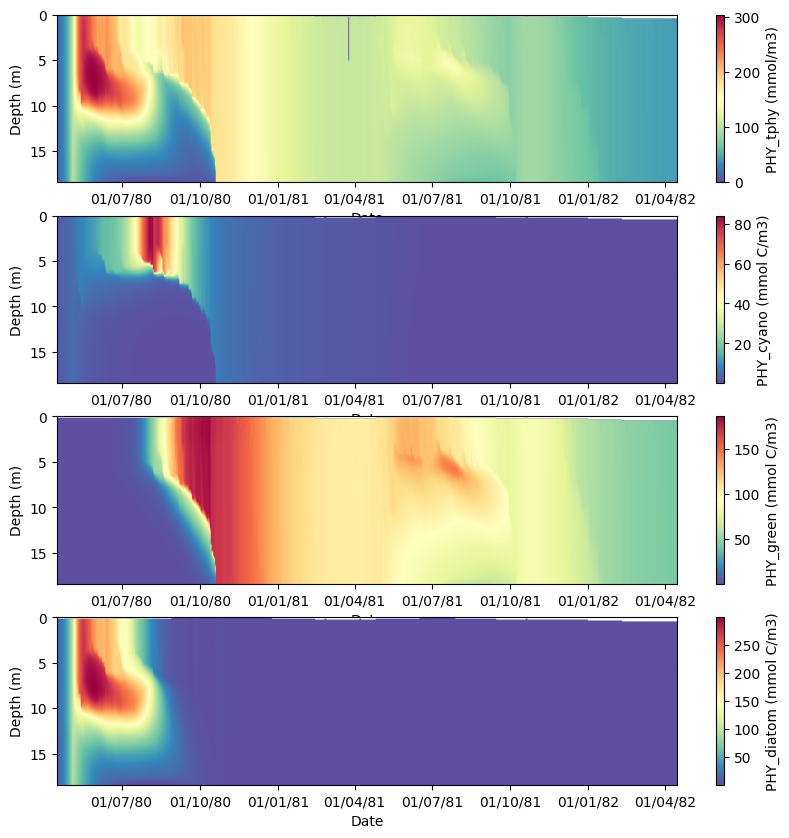

In [69]:
plot_vars = ['PHY_tphy', 'PHY_cyano', 'PHY_green','PHY_diatom']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var} ({units})")

Using our knowledge of limitation functions, lets explore how the different species are responding to temperature:

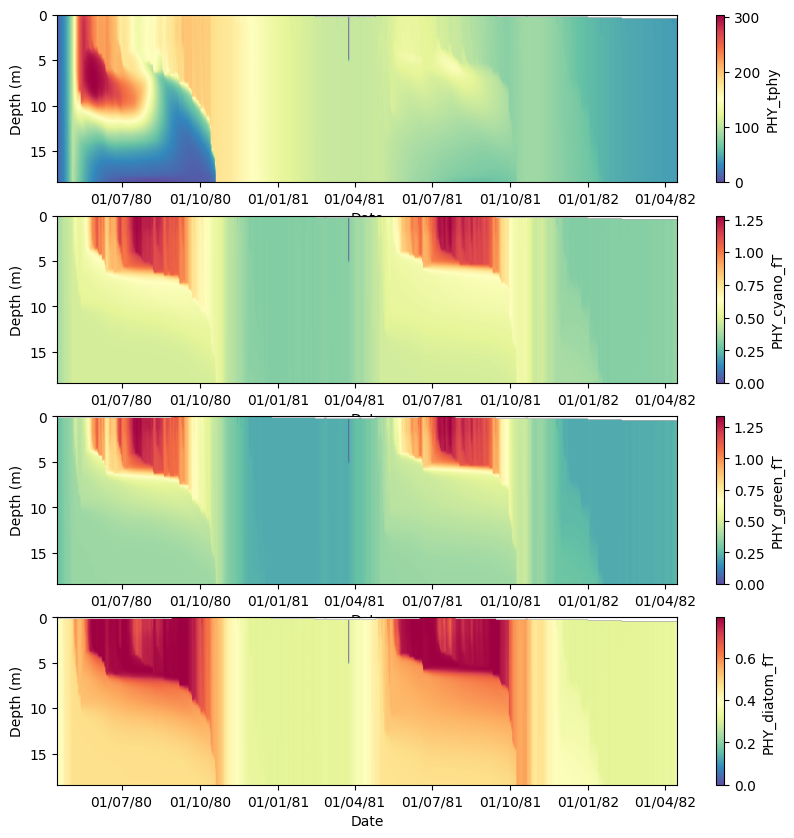

In [70]:
plot_vars = ['PHY_tphy', 'PHY_cyano_fT', 'PHY_green_fT','PHY_diatom_fT']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var}")

____
### Case 6 : Add zooplankton groups -> Predator-Prey Dynamics

In [71]:
nml_file = nml.NMLReader("case_studies/aed_case6.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
sparkling.set_nml(aed_nml_obj)
sparkling.aed_dbase = [
    "case_studies/aed_phyto_pars.csv", "case_studies/aed_zoop_pars.csv"
]
sparkling.get_param_value("aed", "aed_models", "models")

['aed_sedflux',
 'aed_oxygen',
 'aed_silica',
 'aed_nitrogen',
 'aed_phosphorus',
 'aed_organic_matter',
 'aed_phytoplankton',
 'aed_zooplankton']

In [72]:
output = glm_nml.OutputBlock(
    out_dir="output",
    out_fn="output",
    nsave=24,
    csv_lake_fname="lake",
    csv_point_nlevs=2,
    csv_point_fname="WQ_",
    csv_point_at=[3.0, 17.0],  # One at the top and one at the bottom
    csv_point_nvars=6,
    csv_point_vars=["temp", "salt", "OXY_oxy", "PHY_tchla", "PHS_frp", "ZOO_cladoceran"],
)
sparkling.set_block(nml_name="glm", block=output)

In [75]:
sparkling.sim_name = "case_6"

In [76]:
sparkling.run(time_sim=True, write_log=True)

Starting case_6
Finished case_6 in 0:00:12


In [77]:
nc.glm_nc = "case_6/output/output.nc"
nc.get_profile_vars()

['z',
 'H',
 'V',
 'salt',
 'temp',
 'dens',
 'radn',
 'extc',
 'umean',
 'uorb',
 'taub',
 'OXY_oxy',
 'OXY_sat',
 'OXY_oxy_dsfv',
 'OXY_oxy_atmv',
 'SIL_rsi',
 'NIT_amm',
 'NIT_nit',
 'NIT_n2o',
 'NIT_no2',
 'NIT_nitrif',
 'NIT_denit',
 'NIT_anammox',
 'NIT_dnra',
 'NIT_n2oprod',
 'PHS_frp',
 'OGM_doc',
 'OGM_poc',
 'OGM_don',
 'OGM_pon',
 'OGM_dop',
 'OGM_pop',
 'OGM_docr',
 'OGM_donr',
 'OGM_dopr',
 'OGM_cpom',
 'OGM_poc_set',
 'OGM_cpom_set',
 'OGM_pon_set',
 'OGM_pop_set',
 'OGM_cdom',
 'OGM_poc_hyd',
 'OGM_pon_hyd',
 'OGM_pop_hyd',
 'OGM_doc_min',
 'OGM_don_min',
 'OGM_dop_min',
 'OGM_doc_anaerobic',
 'OGM_doc_denit',
 'OGM_docr_min',
 'OGM_donr_min',
 'OGM_dopr_min',
 'OGM_cpom_bdown',
 'OGM_bod5',
 'OGM_pom_vvel',
 'OGM_cpom_vvel',
 'PHY_cyano',
 'PHY_cyano_IN',
 'PHY_cyano_IP',
 'PHY_cyano_NtoP',
 'PHY_cyano_fI',
 'PHY_cyano_fNit',
 'PHY_cyano_fPho',
 'PHY_cyano_fSil',
 'PHY_cyano_fT',
 'PHY_cyano_fSal',
 'PHY_cyano_gpp_c',
 'PHY_cyano_rsp_c',
 'PHY_cyano_exc_c',
 'PHY_cyano_

Let's compare the $Z$ prey ($PHY$ and $POC$) and the $Z$ groups over time ... what do you notice about the different groups?

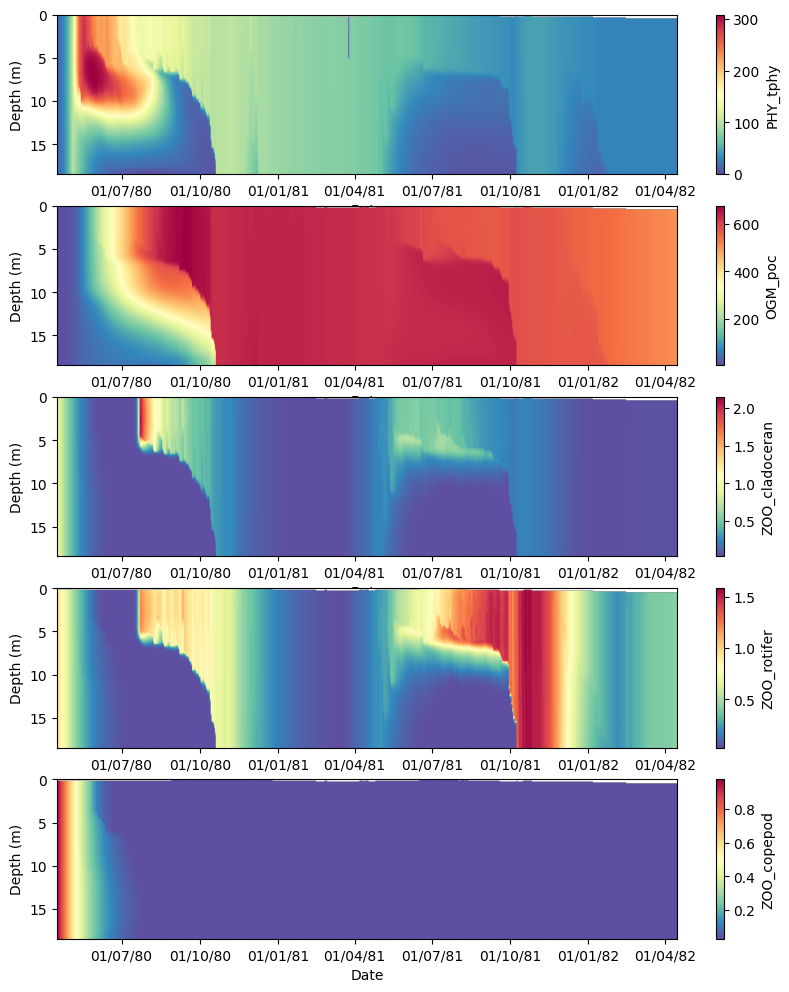

In [78]:
plot_vars = ['PHY_tphy','OGM_poc', 'ZOO_cladoceran', 'ZOO_rotifer','ZOO_copepod']
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var}")

We can now look at the zooplankton commmunity carbon fluxes, grazing $GRZ$, respiration $RSP$ and mortality $MOR$ ...

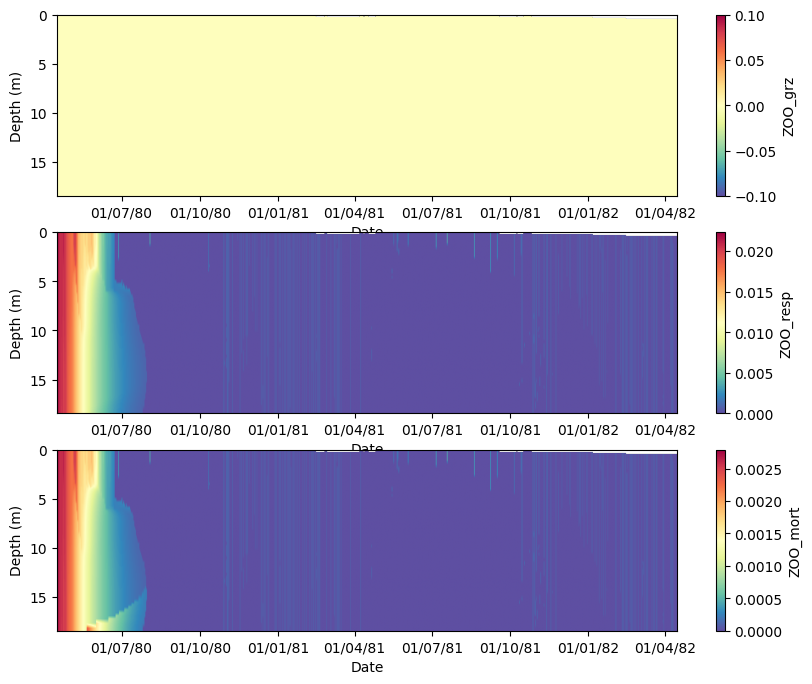

In [79]:
plot_vars = ['ZOO_grz', 'ZOO_resp','ZOO_mort']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
for idx, var, in enumerate(plot_vars):
    out = nc.plot_var_profile(axs[idx], var)
    long_name = nc.get_long_name(var)
    units = nc.get_units(var)
    col_bar = fig.colorbar(out)
    col_bar.set_label(f"{var}")

### Case 7 : Add a benthic macrophyte group

In [ ]:
nml_file = nml.NMLReader("case_studies/aed_case7.json")
aed_nml_obj = nml_file.to_nml_obj(aed_nml.AEDNML)
sparkling.set_nml(aed_nml_obj)
sparkling.aed_dbase = [
    "case_studies/aed_phyto_pars.csv", "case_studies/aed_zoop_pars.csv", "case_studies/aed_macrophyte_pars.csv",
]
sparkling.get_param_value("aed", "aed_models", "models")

In [ ]:
sparkling.sim_name = "case_7"

In [ ]:
sparkling.run(time_sim=True, write_log=True)

In [ ]:
nc.glm_nc = "case_7/output/output.nc"
nc.get_profile_vars()

Let's first remind ourselves what the light climate looks like within the lake:

In [ ]:
var = "PHY_par"
fig, ax = plt.subplots(figsize=(10, 3))
plot_params = {"vmin": 0, "vmax": 550}
out = nc.plot_var_profile(ax=ax, var=var, param_dict=plot_params)
col_bar = fig.colorbar(out)

var_long_name = nc.get_long_name(var)
var_units = nc.get_units(var)
col_bar.set_label(f"{var_long_name} ({var_units})")

Now, in the Case 7 simulation we can inspect the benthic zone variables, and see the $MAC$ module ones:

In [ ]:
nc.get_zone_vars()

Now we can create a simple line plot of the the $MAC$ biomass in each zone:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
nc.plot_var_zone(ax=ax, var="MAC_mac_ben_Z", zone=1, param_dict={"label": "Zone 1"})
nc.plot_var_zone(ax, "MAC_mac_ben_Z", 2, {"label": "Zone 2"})
nc.plot_var_zone(ax, "MAC_mac_ben_Z", 3, {"label": "Zone 3"})
ax.legend()

____
### Scenario (case) comparison using the depth specific csv plot

If we want to compare two or more simulations, we can take advantage of GLM's depth-specific CSV file. The `WQPlotter` class is used for plotting these depth specific CSV outputs, which were set to the name of `WQ_z` in our sim, where z is the output depth:

In [ ]:
wq = plots.WQPlotter("case_1/output/WQ_3.csv")
wq.get_vars()

In [ ]:
wq = plots.WQPlotter("case_3/output/WQ_17.csv")
wq.get_vars()

To compare all 7 case studies, iteratively update the `wq_csv` attribute to the output CSV path and call the `plot_var` method. Configure a legend by passing a dictionary containing the `label` keyword argument to matplotlib's plot method via `param_dict`.

Let's compare $O_2$ first:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
wq = plots.WQPlotter()
for i in range(1, 8):
    wq.wq_csv = f"case_{i}/output/WQ_3.csv"             # BOTTOM
    wq.plot_var(ax, "OXY_oxy", {"label": f"Case {i}"})  # OXYGEN
ax.legend()

Now let's compare $Chl-a$ between cases 3 to 6:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
wq = plots.WQPlotter()
for i in range(3, 7):
    wq.wq_csv = f"case_{i}/output/WQ_17.csv"              # SURFACE
    wq.plot_var(ax, "PHY_tchla", {"label": f"Case {i}"})  # CHL-A
ax.legend()

So these plots help show how common decisions we have to make about model structural complexity can influence even primary water quality variables like $O_2$ and $Chl-a$ !!!

____
### Make your own setup!

Now we have worked through how to navigate a simulation in glm-py, use this SparklingSim to explore some new questions about lake ecosystem dynamics. Contemplate some questions and add some new `code` blocks below to configure, run and plot some new simulation ideas!